### Basic Concepts: Nodes, Edges & State

In [1]:
from typing import TypedDict
from langgraph.graph import START, END, StateGraph

In [2]:
class InputState(TypedDict):
    msg: str
    num: int

In [3]:
def modify_state(state: InputState):
    print(f"Current state: {state}")
    return state

In [4]:
graph = StateGraph(InputState)

In [5]:
graph.add_node("branch_a", modify_state)
graph.add_node("branch_b", modify_state)

In [6]:

graph.add_edge(START, "branch_a")
graph.add_edge("branch_a", "branch_b")
graph.add_edge("branch_b", END)

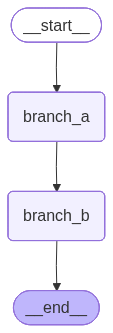

In [7]:
runnable = graph.compile()
runnable

In [8]:
runnable.invoke({"msg": "a"})

Current state: {'msg': 'a'}
Current state: {'msg': 'a'}


{'msg': 'a'}

In [9]:
runnable.invoke({"msg": "a", "num": 1})

Current state: {'msg': 'a', 'num': 1}
Current state: {'msg': 'a', 'num': 1}


{'msg': 'a', 'num': 1}

In [10]:
def modify_state(state: InputState):
    state["msg"] += "a"
    state["num"] += 1
    return state

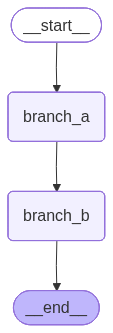

In [11]:
graph = StateGraph(InputState)

graph.add_node("branch_a", modify_state)
graph.add_node("branch_b", modify_state)

graph.add_edge(START, "branch_a")
graph.add_edge("branch_a", "branch_b")
graph.add_edge("branch_b", END)

runnable = graph.compile()
runnable

In [12]:
try:
    runnable.invoke({"msg": "a"})
except Exception as e:
    print(f"Exeption Error: {e}")

Exeption Error: 'num'


In [13]:
runnable.invoke({"msg": "a", "num": 1})

{'msg': 'aaa', 'num': 3}

### Applying LCEL - Langchain

In [14]:
from langchain_core.runnables import RunnableLambda

In [15]:
runnable = RunnableLambda(modify_state)
runnable

RunnableLambda(modify_state)

In [16]:
chain = runnable | runnable
chain

RunnableLambda(modify_state)
| RunnableLambda(modify_state)

In [17]:
chain.invoke({"msg": "a", "num": 1})

{'msg': 'aaa', 'num': 3}